In [114]:
import os

# data analysis and wrangling
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set default formating
pd.set_option('display.max_columns', None)
plt.rc('xtick', labelsize = 13)
plt.rc('ytick', labelsize = 13)
sns.set(style='darkgrid', palette='deep', font_scale=1.2,
       rc={'figure.figsize':(10,6)})

# model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = os.getcwd() + '/'
path

'/Users/macbook/Documents/Academic/Courses/Machine Learning/tmdb_box_office/notebooks/'

In [3]:
# read data
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')
combine = [train_df, test_df]

## STEP 1: DESCRIBE DATA

- **Which features are available in the dataset?**

In [4]:
print(train_df.columns.values)

['id' 'belongs_to_collection' 'budget' 'genres' 'homepage' 'imdb_id'
 'original_language' 'original_title' 'overview' 'popularity'
 'poster_path' 'production_companies' 'production_countries'
 'release_date' 'runtime' 'spoken_languages' 'status' 'tagline' 'title'
 'Keywords' 'cast' 'crew' 'revenue']


 - Based on these features, we can assume that:<br> - The categorical variables that may be important for our prediction are: **belongs_to_collection**, **genres**, **homepage**, **original_language**, **production_companies**, **production_countries**, **spoken_languages**, **status**, **cast**, and **crew**<br> - And similarly, continuous variables that are important may be: **bugdet**, **popularity**, **runtime**, and **release_date**<br> - Of course, our target variable will be **revenue**<br> - Features related to IDs will not be included in out analysis (i.e. **id**, and **imdb_id**)

 - **Preview the data**<br> - We can see that the values on some features (**belongs_to_collection**, **genres**, **production_companies**, **spoken_languages**, **cast**, **crew**) are list-like and therefore need extracting<br> - There is at least 1 movie with 0 budget<br> - Many movies have multiple genres<br> - **original_title** is the title in the orignal language of a movie, whereas **title** is the English translation of that original title
 

In [5]:
train_df.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                NaN   
4                                                NaN   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

 - **What are the data types for various features?**<br>(Knowing the various features helps for converting goal)<br><br>Three features (excluding **id** and **revenue** are either integer or floats). Others are object

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

 - **Which features contain missing values?**<br> - Not all movies belong to a collection, so it make sense for **belongs_to_collection** to have 604 out of 3000 entries<br> - **genres**, **production_companies**, **production_countries**, **spoken_languages**, **cast**, and **crew** lack some values and may require correcting because we assume that these variables may be helpful in predicting the revenue

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

### TARGET VARIABLE: REVENUE

 - **How does the distribution look like?**

count    3.000000e+03
mean     6.674826e+07
std      1.375228e+08
min      2.000000e+00
25%      2.404680e+06
50%      1.680873e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

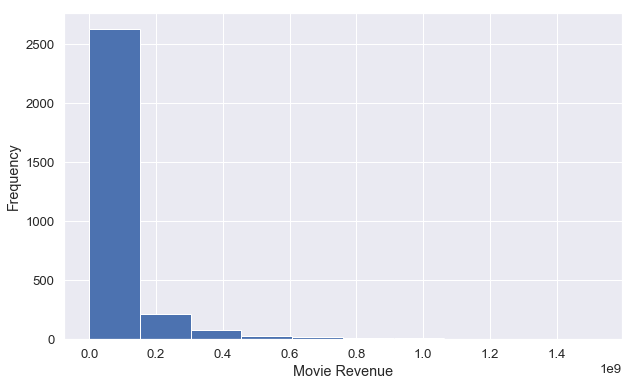

In [115]:
train_df.revenue.plot.hist()
plt.hist(train_df.revenue, color='b')
plt.xlabel('Movie Revenue')
train_df.revenue.describe()

It is very hard to see the distribution of movies with higher revenue, so we're going to use log transformation on this variable. After the transformation, it looks like the graph is a little left-skewed, with more movies with lower revenue

0    16.33
1    18.37
2    16.39
3    16.59
4    15.18
Name: transformed_revenue, dtype: float64

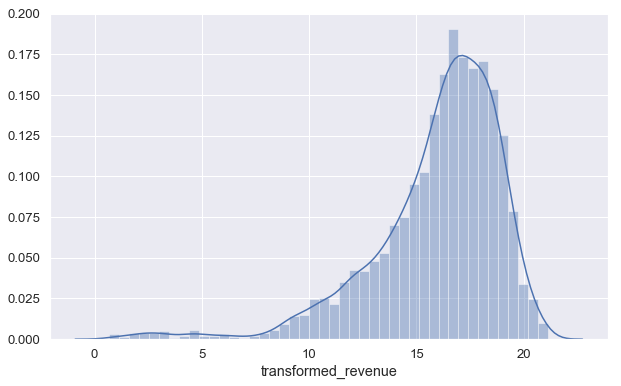

In [116]:
train_df['transformed_revenue'] = pd.Series(round((np.log(train_df.revenue)), 2))
sns.distplot(train_df.transformed_revenue)
train_df.transformed_revenue.head()

 - **Filling in missing values**

Also, there are only **4** movies with $1 revenue, so we can use median to replace these revenue values

In [10]:
train_df.loc[train_df['revenue'] == 1, 'revenue'] = train_df.revenue.median()

### NUMERICAL VARIABLES

 - **What is the distribution of numerical feature values across the samples?**<br> - 25% of the movies have 0 bugdet<br> - Popularity varied significantly with few movies reaching as high as 294<br> - Some movies run as long as 5.5 hours
 

In [11]:
train_df.describe()

id        budget   popularity      runtime       revenue  \
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03   
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.674826e+07   
std     866.169729  3.702609e+07    12.104000    22.086434  1.375228e+08   
min       1.000000  0.000000e+00     0.000001     0.000000  2.000000e+00   
25%     750.750000  0.000000e+00     4.018053    94.000000  2.404680e+06   
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680873e+07   
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07   
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09   

       transformed_revenue  
count          3000.000000  
mean             15.959860  
std               3.071256  
min               0.000000  
25%              14.685000  
50%              16.640000  
75%              18.050000  
max              21.140000

### CATEGORICAL VARIABLES

 - **How about the distribution of categorical feature values?**<br> - 604 movies belong to a collection, and many of them are under a similar collection<br> - Drama is the most popular genre (accounting for about 9% of the movies)<br> - About 85% of the movies have English as the original language, although just about 61% of them use English as the spoken language<br> - Some movies have the same title<br> - 4 movies hasn't been released<br> - Some movies lack information about the cast

In [12]:
train_df.describe(include=['O'])

belongs_to_collection  \
count                                                 604   
unique                                                422   
top     [{'id': 645, 'name': 'James Bond Collection', ...   
freq                                                   16   

                               genres                           homepage  \
count                            2993                                946   
unique                            872                                941   
top     [{'id': 18, 'name': 'Drama'}]  http://www.transformersmovie.com/   
freq                              266                                  4   

          imdb_id original_language original_title  \
count        3000              3000           3000   
unique       3000                36           2975   
top     tt0289992                en         Sahara   
freq            1              2575              2   

                                                 overview  \
count                                                2992   
unique                                               2992   
top     In 1970, a few days before Christmas, Elvis Pr...   
freq                                                    1   

                             poster_path  \
count                               2999   
unique                              2999   
top     /jxNBmnP2Q1hTWuqCPUTRavGrjLt.jpg   
freq                                   1   

                             production_companies  \
count                                        2844   
unique                                       2383   
top     [{'name': 'Paramount Pictures', 'id': 4}]   
freq                                           51   

                                     production_countries release_date  \
count                                                2945         3000   
unique                                                321         2398   
top     [{'iso_3166_1': 'US', 'name': 'United States o...      9/10/15   
freq                                                 1752            5   

                                spoken_languages    status  \
count                                       2980      3000   
unique                                       401         2   
top     [{'iso_639_1': 'en', 'name': 'English'}]  Released   
freq                                        1817      2996   

                       tagline       title  \
count                     2403        3000   
unique                    2400        2969   
top     Based on a true story.  The Double   
freq                         3           2   

                                           Keywords  cast  \
count                                          2724  2987   
unique                                         2648  2975   
top     [{'id': 10183, 'name': 'independent film'}]    []   
freq                                             27    13   

                                                     crew  
count                                                2984  
unique                                               2984  
top     [{'credit_id': '52fe472dc3a36847f8127603', 'de...  
freq                                                    1

## STEP 2: VISUALIZE & WRANGLE DATA

 
 - The purpose of visualization is to confirm if there is a relationship between each of the independent variables and the revenue
 - As it is hard to see the distribution of revenue, we will always use log transformation for our visualizations

### NUMERICAL VARIABLES

Our initial assumption is that **bugdet**, **popularity**, **runtime**, and **release_date** may be important for the prediction of movie revenue, so we're going to do pair-wise visualization between each of these variables and the revenue variable

 - **budget**

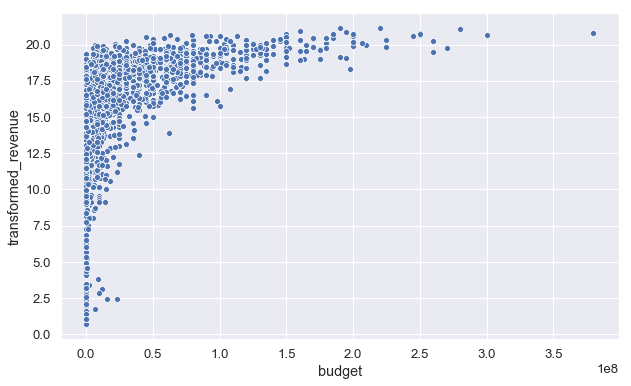

In [117]:
sns.scatterplot(x=train_df.budget, y=train_df.transformed_revenue)

There seems to be a positive correlation between **budget** and **revenue**, however it's a little difficult to see the values at the top left corner of the graph, so we're going to log-tranform **budget**

[Text(0.5, 0, 'transformed_budget')]

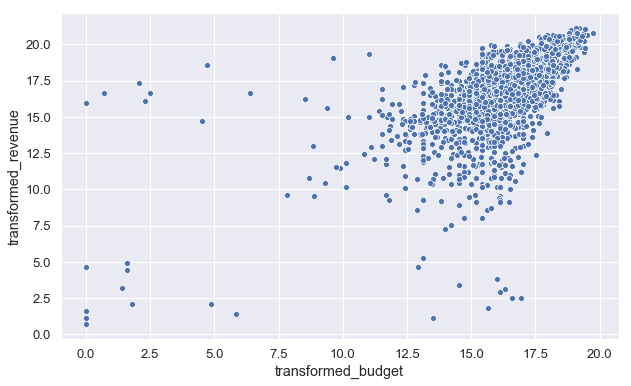

In [119]:
sns.scatterplot(x=train_df.budget.apply(
                lambda x: np.log(x)),
                y=train_df.transformed_revenue).set(xlabel='transformed_budget')

Now it's much easier to see that there is a linear relationship between **bugdet** and **revenue**

 - **popularity**

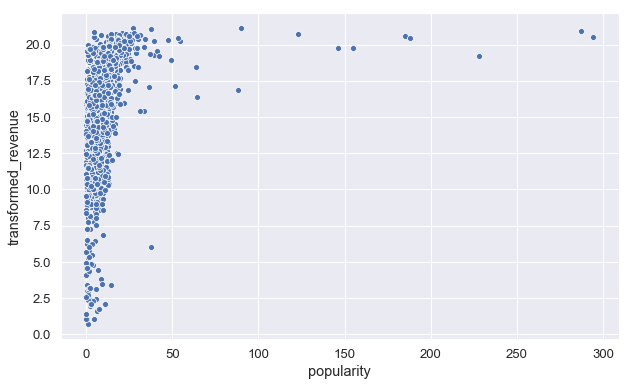

In [120]:
sns.scatterplot(x=train_df.popularity,
               y=train_df.transformed_revenue)

Again, it's hard to see the relationship in the graph, so we're going to log-transform **popularity**

[Text(0.5, 0, 'transformed_popularity')]

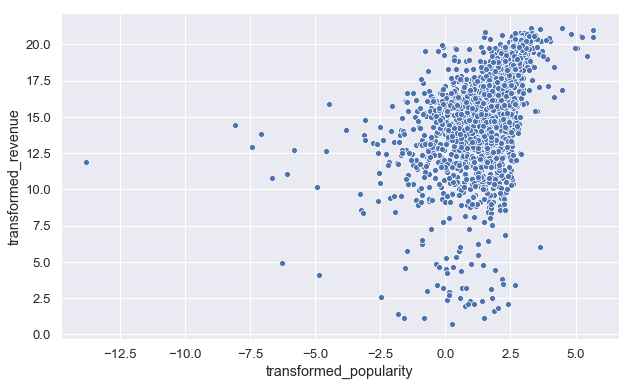

In [121]:
sns.scatterplot(x=train_df.popularity.apply(
                lambda x: np.log(x)),
               y=train_df.transformed_revenue).set(xlabel='transformed_popularity')

 - **runtime**

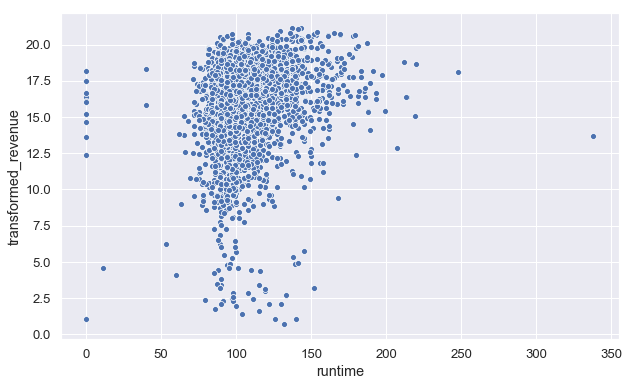

In [122]:
sns.scatterplot(x=train_df.runtime,
               y=train_df.transformed_revenue)

There seems to be no relationship between **runtime** and **revenue** so we're not including this variable in our prediction

 - **release_date**<br>**Note**:<br> - We're going to extract the month and the decade when a movie was released to see if there is any trend<br> - As this variable is a time-based one, we're using line graph instead of scatterplot

In [18]:
import calendar

# EXTRACT RELEASE MONTH
for dataset in combine:
    dataset['release_month'] = dataset.release_date.dropna().apply(
                                                            lambda d: calendar.month_abbr[int(d[:d.find('/')])])
    dataset.release_month.fillna(dataset.release_month.mode()[0], inplace=True)

    
# EXTRACT RELEASE YEAR
for dataset in combine:
    dataset['release_year_2_digits'] = dataset.release_date.dropna().apply(
                                                            lambda d: d[-2:]).astype(int)
# convert the extracted year from 2-digit format to 4-digit format
for dataset in combine:
    dataset.loc[dataset.release_year_2_digits <= 19,
                 'release_year'] = 2000 + dataset.release_year_2_digits.dropna()
    dataset.loc[dataset.release_year_2_digits > 19,
                'release_year'] = 1900 + dataset.release_year_2_digits.dropna()
    dataset.release_year.fillna(dataset.release_year.mode()[0], inplace=True)
    dataset.release_year = dataset.release_year.astype(int)

    
# GET RELEASE DECADE
# if a movie was released in the 2000s
for dataset in combine:
    dataset.loc[(dataset.release_year >= 2000) &
                (dataset.release_year <= 2009),
                'release_decade'] = str(2000) + 's'
    # if a movie was released in the 2010s
    dataset.loc[(dataset.release_year >= 2010) &
                (dataset.release_year <= 2019),
                'release_decade'] = str(2010) + 's'
    # if a movie was released in the 1900s
    dataset.loc[dataset.release_year < 2000,
                'release_decade'] = ((dataset.release_year // 10 * 10).astype(str)) + 's'

In [19]:
# Preview of these created time-related variables on train and test datasets
print(train_df[['release_date','release_month','release_year','release_decade']].tail())
print('-' * 60)
print(test_df[['release_date','release_month','release_year','release_decade']].tail())

     release_date release_month  release_year release_decade
2995      4/22/94           Apr          1994          1990s
2996      3/28/13           Mar          2013          2010s
2997     10/11/96           Oct          1996          1990s
2998      1/16/04           Jan          2004          2000s
2999      9/22/11           Sep          2011          2010s
------------------------------------------------------------
     release_date release_month  release_year release_decade
4393       8/3/01           Aug          2001          2000s
4394      8/20/04           Aug          2004          2000s
4395      12/8/82           Dec          1982          1980s
4396       2/4/15           Feb          2015          2010s
4397      9/20/62           Sep          1962          1960s


Let's see if there is any relationship between **revenue** and **release_month**

In [123]:
train_df[['release_month', 'transformed_revenue']].groupby(
                                        by='release_month', as_index=True).mean().sort_values(
                                        by='transformed_revenue', ascending=False)

transformed_revenue
release_month                     
Dec                      16.871939
Jul                      16.804737
Jun                      16.649831
Mar                      16.148529
Aug                      16.113203
Nov                      16.006471
Apr                      15.969265
May                      15.932768
Feb                      15.796062
Oct                      15.523713
Jan                      15.303915
Sep                      15.147320

How about **revenue** and **release_decade**?

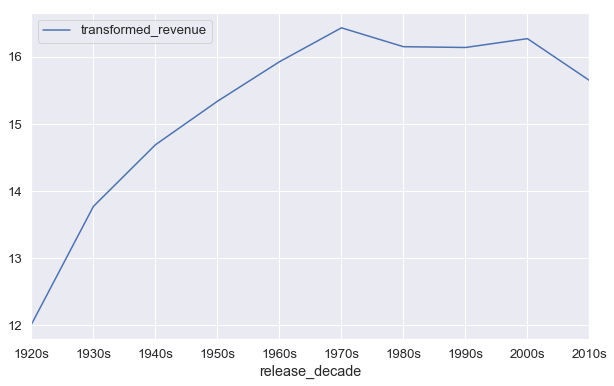

In [124]:
train_df[['release_decade','transformed_revenue']].groupby(
                                                    by='release_decade', as_index=True).mean().plot.line()

The second half of the 19th century and the 2000s decade are definitely when movie revenues are much higher, even though there was a downward trend after the 1970s and since 2000s

### Conclusion on numerical variables
**budget**, **popularity**, **release_month**, and **release_decade** will be included in our model

In [22]:
X_test_numerical = test_df[['budget', 'popularity',
                            'release_month', 'release_decade']]

X_train_numerical = train_df[['budget', 'popularity',
                              'release_month', 'release_decade']]

### CATEGORICAL VARIABLES

**Again, the categorical variables that may be important for our prediction are:**<br> - belongs_to_collection<br> - genres<br> - original_language<br> - spoken_languages<br> - production_companies<br> - production_countries<br> - cast<br> - crew<br> - status

As many of categorical variables above are actually list-like values, we will create functions called **`extract_data`**, **`extract_data_for_producer`**, **`extract_data_for_director`** to extract the data

In [23]:
def extract_data(row, key):
    eval_row = eval(row)
    if eval_row:
        extracted_list = []
        for each_dict in eval_row:
            if type(each_dict) is str:
                dictionary = eval(each_dict)
            else:
                dictionary = each_dict.copy()
            extracted_list.append(str(dictionary[key]))
            string = '|'.join(extracted_list)
        return string

In [24]:
def extract_data_for_producer(row):
    # create a function to extract the names of producer/executive producer in a movie
    eval_row = eval(row)
    if eval_row:
        producer_list = []
        for each_dict in eval_row:
            if type(each_dict) is str:
                dictionary = eval(each_dict)
            else:
                dictionary = each_dict.copy()
            for value in dictionary.values():
                if value in ['Producer', 'Executive Producer']:
                    producer_list.append(str(dictionary['name']))
        producer = '|'.join(producer_list)
    return producer

In [25]:
def extract_data_for_director(row):
    # create a function to extract the name of a director in a movie
    eval_row = eval(row)
    if eval_row:
        director = ''
        for each_dict in eval_row:
            if type(each_dict) is str:
                dictionary = eval(each_dict)
            else:
                dictionary = each_dict.copy()
            if 'Director' in dictionary.values():
                director = str(dictionary['name'])
    return director

In [26]:
def eng_as_spoken_language(row):
    row_as_string = str(row)
    if 'en' in row_as_string:
        result = 1
    elif 'en' not in row_as_string:
        result = 0
    return result

 - **Extract data**<br> We're going to create these new variables for both train and test datasets:<br>- collection_name<br>- genre_name<br>- spoken_language_abbr<br>- eng_as_spoken_language<br>- production_company_name<br>- production_country_name<br>- keyword_name<br>- actors<br>- main_actors<br>- producer<br>- director<br>- belongs_to_collection (a feature that indicates whether a movie belongs to a collection (0=No, 1=Yes))<br>- eng_as_original_language (a feature that indicates whether a movie has English as its original language (0=No, 1=Yes))<br><br>**Note**:<br>- On the **crew** feature, we will extract only the producer and the director of a movie, because according to Wikipedia, producers and directors are two of the factors that contribute to movie budgeting<br>- On the **cast** feature, we will extract only the first 5 actors for each movie, assuming that a movie can have up to 5 main characters
 

In [27]:
for dataset in combine:
    dataset['collection_name'] = dataset['belongs_to_collection'].dropna().apply(
                                                    lambda x: extract_data(x, 'name'))
    dataset['genre_name'] = dataset['genres'].dropna().apply(
                                                    lambda x: extract_data(x, 'name'))
    dataset['spoken_language_abbr'] = dataset['spoken_languages'].dropna().apply(
                                                    lambda x: extract_data(x, 'iso_639_1'))
    dataset['production_company_name'] = dataset['production_companies'].dropna().apply(
                                                    lambda x: extract_data(x, 'name'))
    dataset['production_country_name'] = dataset['production_countries'].dropna().apply(
                                                    lambda x: extract_data(x, 'name'))
    dataset['keyword_name'] = dataset['Keywords'].dropna().apply(
                                                    lambda x : extract_data(x, 'name'))
    dataset['actors'] = dataset['cast'].dropna().apply(
                                                    lambda x: extract_data(x, 'name'))
    dataset['producer'] = dataset['crew'].dropna().apply(
                                                    lambda x : extract_data_for_producer(x))
    dataset['director'] = dataset.crew.dropna().apply(
                                                    lambda x : extract_data_for_director(x))

In [28]:
for dataset in combine:
    dataset['main_actors'] = dataset['actors'].str.split('|')
    dataset.main_actors = dataset.main_actors.str[:5]
    dataset.main_actors = dataset.main_actors.dropna().apply(lambda x : '|'.join(x))


In [29]:
for dataset in combine:
    dataset['eng_as_spoken_language'] = dataset.spoken_language_abbr.apply(
                                                        lambda row: eng_as_spoken_language(row))

In [30]:
for dataframe in combine:
    dataframe['belong_to_collection_binary'] = 1
    dataframe.loc[dataframe['belongs_to_collection'].isnull(),
               'belong_to_collection_binary'] = 0

In [32]:
for dataframe in combine:
    dataframe['eng_as_original_language'] = 1
    dataframe.loc[dataframe.original_language != 'en', 'eng_as_original_language'] = 0

 - **belong_to_collection_binary**

In [31]:
train_df[['belong_to_collection_binary','transformed_revenue','revenue']].groupby(
                                        by='belong_to_collection_binary').mean()

transformed_revenue       revenue
belong_to_collection_binary                                   
0                                      15.565309  4.331965e+07
1                                      17.525000  1.596869e+08

It looks like movies that does belong to a collection tend to have a much higher revenue

 - **eng_as_original_language**

In [33]:
train_df[['eng_as_original_language','transformed_revenue','revenue']].groupby(
                                        by='eng_as_original_language').mean()

transformed_revenue       revenue
eng_as_original_language                                   
0                                   14.494847  1.861845e+07
1                                   16.201658  7.469202e+07

Movies whose the original language is English clearly have a much higher revenue

 - **original_language**

In [34]:
train_df[['original_language','transformed_revenue']].groupby(
                                            by='original_language', as_index=True).mean().sort_values(
                                            by='transformed_revenue', ascending=False).head()

transformed_revenue
original_language                     
pl                           16.520000
he                           16.220000
en                           16.201658
el                           15.890000
ja                           15.818378

There seems to be no clear relationship between this feature and movie revenue

 - **collection_name**

In [35]:
train_df[['collection_name','transformed_revenue']].groupby(
                                                    by='collection_name').mean().sort_values(
                                                    by='transformed_revenue', ascending=False).head(8)

transformed_revenue
collection_name                                         
The Avengers Collection                        21.100000
Finding Nemo Collection                        20.750000
Alice in Wonderland Collection                 20.750000
The Hobbit Collection                          20.710000
Jurassic Park Collection                       20.640000
The Lord of the Rings Collection               20.620000
Harry Potter Collection                        20.620000
Pirates of the Caribbean Collection            20.583333

 - **genres**<br>**Note**: We need to split genres so that we can group them later

In [36]:
split_genres = train_df.set_index('title')['genre_name'].str.split('|', expand=True).stack().reset_index(
                                                                                level=0, name='genre_name')

In [37]:
genre_and_revenue = pd.merge(split_genres, train_df,
                             left_on='title', right_on='title',
                             how='left')[['title','genre_name_x','transformed_revenue']]
genre_and_revenue = genre_and_revenue.rename(columns={'genre_name_x':'genre_name'})
genre_and_revenue.head()

title genre_name  transformed_revenue
0                    Hot Tub Time Machine 2     Comedy                16.33
1  The Princess Diaries 2: Royal Engagement     Comedy                18.37
2  The Princess Diaries 2: Royal Engagement      Drama                18.37
3  The Princess Diaries 2: Royal Engagement     Family                18.37
4  The Princess Diaries 2: Royal Engagement    Romance                18.37

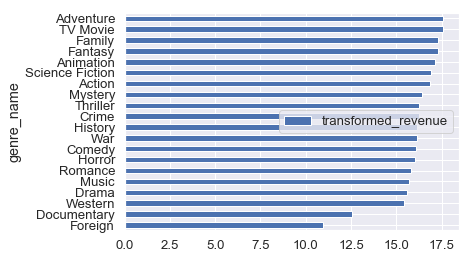

In [38]:
genre_and_revenue[['genre_name','transformed_revenue']].groupby(
                                                by='genre_name', as_index=True).mean().sort_values(
                                                by='transformed_revenue', ascending=True).plot.barh()

There is definitely a relationship between the genre(s) of a movie and its revenue, so we're taking **genre_name** into our preditive model

 - **spoken_language_abbr**

In [39]:
# create a variable to see how many spoken languages are present in a movie
train_df['number_of_spoken_languages'] = train_df['spoken_language_abbr'].dropna().apply(
                                                        lambda x: len(x))
train_df.number_of_spoken_languages.head()

0    2.0
1    2.0
2    2.0
3    5.0
4    2.0
Name: number_of_spoken_languages, dtype: float64

In [40]:
train_df[['number_of_spoken_languages', 'transformed_revenue']].groupby(
                                        by='number_of_spoken_languages', as_index=True).mean().sort_values(
                                        by='transformed_revenue', ascending=False)

transformed_revenue
number_of_spoken_languages                     
14.0                                  17.887826
11.0                                  17.235000
26.0                                  16.500000
20.0                                  16.460000
8.0                                   16.444491
5.0                                   16.173406
17.0                                  15.856667
2.0                                   15.825055
23.0                                  13.100000

It seems like there is not a clear relationship between the number of spoken languages and movie revenue though

 - **eng_as_spoken_language**

In [41]:
train_df[['eng_as_spoken_language','transformed_revenue','revenue']].groupby(
                                        by='eng_as_spoken_language', as_index=True).mean().sort_values(
                                        by='transformed_revenue')

transformed_revenue       revenue
eng_as_spoken_language                                   
0                                 14.116152  1.806735e+07
1                                 16.228881  7.385143e+07

It's clear that movies that have English as one of its spoken languages have higher revenue, so we're taking this variable into our prediction

 - **spoken_language_abbr**<br>Again, we need to split spoken languages so that we can group them later

In [42]:
split_spoken_languages = train_df.set_index('title').spoken_language_abbr.str.split('|', expand=True).stack()
split_spoken_languages = split_spoken_languages.reset_index(level=0, name='spoken_language_abbr')

spoken_language_and_revenue = pd.merge(split_spoken_languages, train_df, how='left',
                                       left_on='title', right_on='title')
spoken_language_and_revenue = spoken_language_and_revenue[['title',
                                                           'spoken_language_abbr_x',
                                                           'transformed_revenue']].rename(
                                                        columns={'spoken_language_abbr_x': 'spoken_language_abbr'})
spoken_language_and_revenue.head()

title spoken_language_abbr  \
0                    Hot Tub Time Machine 2                   en   
1  The Princess Diaries 2: Royal Engagement                   en   
2                                  Whiplash                   en   
3                                   Kahaani                   en   
4                                   Kahaani                   hi   

   transformed_revenue  
0                16.33  
1                18.37  
2                16.39  
3                16.59  
4                16.59

In [43]:
spoken_language_and_revenue[['spoken_language_abbr','transformed_revenue']].groupby(
                            by='spoken_language_abbr').mean().sort_values(
                            by='transformed_revenue', ascending=False).head()

transformed_revenue
spoken_language_abbr                     
si                                  19.62
et                                  19.24
ny                                  19.17
xh                                  19.17
st                                  19.17

There seems to be no clear relationship between spoken language(s) and revenue though

 - **production_company_name**

In [44]:
split_production_companies = train_df.set_index('title').production_company_name.str.split('|', expand=True).stack()
split_production_companies = split_production_companies.reset_index(level=0, name='production_company_name')
production_company_and_revenue = pd.merge(split_production_companies, train_df,
                                         left_on='title', right_on='title', how='left')[[
                                            'title', 'production_company_name_x', 'transformed_revenue']]
production_company_and_revenue = production_company_and_revenue.rename(
                                columns={'production_company_name_x': 'production_company_name'})
production_company_and_revenue.head()

title    production_company_name  \
0                    Hot Tub Time Machine 2         Paramount Pictures   
1                    Hot Tub Time Machine 2             United Artists   
2                    Hot Tub Time Machine 2  Metro-Goldwyn-Mayer (MGM)   
3  The Princess Diaries 2: Royal Engagement       Walt Disney Pictures   
4                                  Whiplash                 Bold Films   

   transformed_revenue  
0                16.33  
1                16.33  
2                16.33  
3                18.37  
4                16.39

In [45]:
production_company_and_revenue[['production_company_name','transformed_revenue']].groupby(
                                by='production_company_name', as_index=True).mean().sort_values(
                                by='transformed_revenue', ascending=False).head()

transformed_revenue
production_company_name                                         
Colorado Office of Film, Television & Media                21.13
Abu Dhabi Film Commission                                  21.13
Québec Production Services Tax Credit                      21.13
Indochina Productions                                      20.84
Hurwitz Creative                                           20.75

 - **production_country**

In [46]:
split_production_countries = train_df.set_index('title').production_country_name.str.split('|', expand=True).stack()
split_production_countries = split_production_countries.reset_index(level=0, name='production_country_name')
production_country_and_revenue = pd.merge(split_production_countries, train_df,
                                         left_on='title', right_on='title', how='left')[[
                                            'title', 'production_country_name_x', 'transformed_revenue']]
production_country_and_revenue =  production_country_and_revenue.rename(
                                            columns={'production_country_name_x': 'production_country_name'})
production_country_and_revenue.head()

title   production_country_name  \
0                    Hot Tub Time Machine 2  United States of America   
1  The Princess Diaries 2: Royal Engagement  United States of America   
2                                  Whiplash  United States of America   
3                                   Kahaani                     India   
4                                Marine Boy               South Korea   

   transformed_revenue  
0                16.33  
1                18.37  
2                16.39  
3                16.59  
4                15.18

In [47]:
production_country_and_revenue[['production_country_name','transformed_revenue']].groupby(
                                                by='production_country_name', as_index=True).mean().sort_values(
                                                by='transformed_revenue', ascending=False).head()

transformed_revenue
production_country_name                     
Slovenia                              19.850
Malta                                 19.075
Iceland                               18.985
Paraguay                              18.910
Uruguay                               18.910

It looks like movies that are produced by countries in the Central Europe, West Europe, and the other half of South American make more revenue, so we're going to use this feature for our analysis

 - **main_actors**

In [48]:
split_main_actors = train_df.set_index('title').main_actors.str.split('|', expand=True).stack()
split_main_actors = split_main_actors.reset_index(level=0, name='main_actor')

main_actor_and_revenue = pd.merge(split_main_actors, train_df,
                                         left_on='title', right_on='title', how='left')[[
                                            'title', 'main_actor', 'transformed_revenue']]

main_actor_and_revenue.head(10)

title         main_actor  \
0                    Hot Tub Time Machine 2        Rob Corddry   
1                    Hot Tub Time Machine 2     Craig Robinson   
2                    Hot Tub Time Machine 2         Clark Duke   
3                    Hot Tub Time Machine 2         Adam Scott   
4                    Hot Tub Time Machine 2        Chevy Chase   
5  The Princess Diaries 2: Royal Engagement      Anne Hathaway   
6  The Princess Diaries 2: Royal Engagement      Julie Andrews   
7  The Princess Diaries 2: Royal Engagement   H√©ctor Elizondo   
8  The Princess Diaries 2: Royal Engagement   John Rhys-Davies   
9  The Princess Diaries 2: Royal Engagement  Heather Matarazzo   

   transformed_revenue  
0                16.33  
1                16.33  
2                16.33  
3                16.33  
4                16.33  
5                18.37  
6                18.37  
7                18.37  
8                18.37  
9                18.37

In [49]:
main_actor_and_revenue[['main_actor','transformed_revenue']].groupby(
                                                by='main_actor', as_index=True).mean().sort_values(
                                                by='transformed_revenue', ascending=False).head()

transformed_revenue
main_actor                          
Shakira                        20.75
Hayden Rolence                 20.75
Ellen DeGeneres                20.75
Graham McTavish                20.68
Bob Peck                       20.64

Although there is not a clear connection between the main actors and movie revenue from the above examination, we're still taking this feature into our prediction, assuming that cast is important for the box office revenue of a movie

 - **director**

In [50]:
train_df[['director','revenue']].groupby(
                                        by='director', as_index=True).mean().sort_values(
                                        by='revenue', ascending=False).head()

revenue
director                   
Joss Whedon    1.462481e+09
Angus MacLane  1.028571e+09
Jared Bush     1.023784e+09
David Yates    9.339592e+08
James Gunn     8.183724e+08

### Conclusion on categorical variables

We will be taking **belong_to_collection_binary**, **genre_name**, **eng_as_original_language**, **eng_as_spoken_language**, **production_country_name**, and **main_actors** into our prediction

In [51]:
X_train_categorical = train_df[['belong_to_collection_binary',
                                'collection_name','genre_name',
                               'eng_as_original_language', 'eng_as_spoken_language',
                               'production_country_name', 'main_actors']]
X_test_categorical = test_df[['belong_to_collection_binary',
                                'collection_name','genre_name',
                               'eng_as_original_language', 'eng_as_spoken_language',
                               'production_country_name', 'main_actors']]

In [52]:
X_train = pd.merge(X_train_numerical, X_train_categorical, how='outer',
                  left_index=True, right_index=True)

X_test = pd.merge(X_test_numerical, X_test_categorical, how='outer',
                 left_index=True, right_index=True)

As there may be missing values in the chosen categorical variables, we need to handle them before creating dummy varariables

## STEP 3: HANDLE MISSING DATA

### NUMERICAL FEATURES

 - **bugdet** 

In [53]:
# Number of 0 budget on test dataset
print('Number of 0 budget on test dataset: {}'.format(X_test[X_test['budget'] == 0].shape[0]))
# Number of 0 budget on train dataset
print('Number of 0 budget on train dataset: {}'.format(X_train[X_train['budget'] == 0].shape[0]))

Number of 0 budget on test dataset: 1211
Number of 0 budget on train dataset: 812


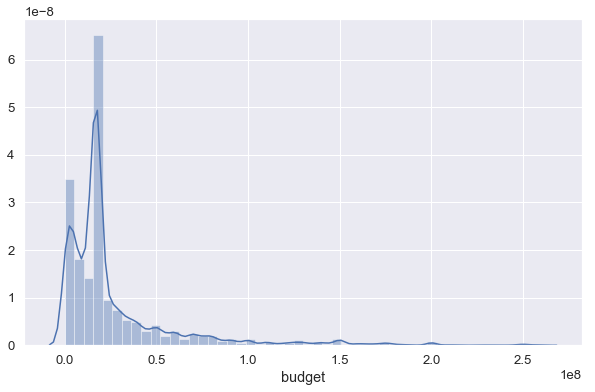

In [128]:
sns.distplot(X_test.budget[X_test.budget != 0])

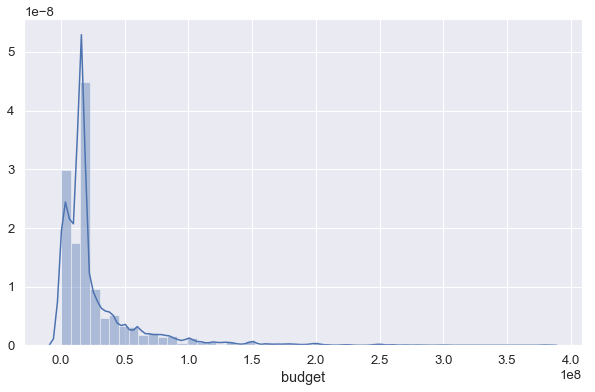

In [126]:
sns.distplot(X_train.budget[X_train.budget != 0])

As the distribution of the budget feature is extremely skewed, we can use median to fill in the missing values

In [56]:
X_train.budget.replace(to_replace = 0, 
                 value = X_train.budget[X_train.budget != 0].median(), inplace=True) 

X_test.budget.replace(to_replace = 0,
                value = X_test.budget[X_test.budget != 0].median(), inplace=True)

### CATEGORICAL FEATURES

#### TRAIN DATASET

 - **genre_name**

In [57]:
print('The number of missing values for the genre_name feature on the train dataset is {}'.format(
                                        X_train[X_train.genre_name.isnull()].shape[0]))


The number of missing values for the genre_name feature on the train dataset is 7


In [58]:
X_train[X_train.genre_name.isnull()]

budget  popularity release_month release_decade  \
470    2000000    0.079856           Sep          2000s   
1622    400000    0.218588           Jul          2000s   
1814   2700000    0.677253           Oct          1990s   
1819  16000000    0.518078           Sep          2000s   
2423    500000    0.493342           Aug          1990s   
2686  16000000    0.158207           Jul          2000s   
2900    200000    0.560685           Nov          2010s   

      belong_to_collection_binary collection_name genre_name  \
470                             0             NaN        NaN   
1622                            0             NaN        NaN   
1814                            0             NaN        NaN   
1819                            0             NaN        NaN   
2423                            0             NaN        NaN   
2686                            0             NaN        NaN   
2900                            0             NaN        NaN   

      eng_as_original_language  eng_as_spoken_language  \
470                          1                       0   
1622                         1                       0   
1814                         0                       0   
1819                         0                       0   
2423                         1                       0   
2686                         0                       0   
2900                         1                       0   

     production_country_name  \
470                      NaN   
1622                     NaN   
1814           France|Russia   
1819                  Russia   
2423                   India   
2686                     NaN   
2900                  Russia   

                                            main_actors  
470                        Kirby Heyborne|Michael Flynn  
1622  Jon Gries|Daryl Hannah|Adam Baldwin|Garrett Mo...  
1814                                                NaN  
1819  Renata Litvinova|Dmitriy Orlov|Inga Strelkova-...  
2423  Ajith Kumar|Shalini|Raghuvaran|Radhika Sarathk...  
2686                                                NaN  
2900  Mitya Borisov|Lev Danilkin|Sergei Debizhev|Tat...

From the above examination, we can see that:
<br>- The **popularity** for these movies is pretty low, with a threshold of 0.7
<br>- The **release decade** is 1990s and 2000s
<br>- Those movies do **not have English as a spoken language**
<br> With these observations, we can use the relationship between the genre_name and these features to identify the most popular genres

In [59]:
# GENRE & POPULARITY
# As the maximum popularity on the above table is 0.7, we can create a mask with this threshold,
# then see which genres are most popular for the movies whose popularity is lower than 0.7
set1 = train_df.genre_name[train_df['popularity'] < 0.7].str.split('|',
                                                            expand=True).stack().value_counts().head(5).index
set1

Index(['Drama', 'Comedy', 'Romance', 'Documentary', 'Foreign'], dtype='object')

In [60]:
# GENRE & RELEASE_DECADE
set2 = train_df.genre_name[train_df['release_decade'] == ('1990s' or '2000s')].str.split('|',
                                                            expand=True).stack().value_counts().head(5).index
set2

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance'], dtype='object')

In [61]:
# GENRE * ENG_AS_SPOKEN_LANGUAGE
set3 = train_df.genre_name[train_df['eng_as_spoken_language'] == 0].str.split('|',
                                                            expand=True).stack().value_counts().head(5).index
set3

Index(['Drama', 'Comedy', 'Action', 'Romance', 'Thriller'], dtype='object')

In [62]:
# Now we can get the values for the value-missing genres
imputing_genres = '|'.join(list(set1.intersection(set2).intersection(set3)))
imputing_genres

'Drama|Comedy|Romance'

In [63]:
X_train.genre_name = X_train.genre_name.fillna(imputing_genres)

 - **production_country_name**

In [64]:
X_train[X_train.production_country_name.isnull()]

budget  popularity release_month release_decade  \
5      8000000    0.743274           Aug          1980s   
7     16000000    1.949044           Jan          2000s   
38    16000000    0.329260           Sep          2010s   
259      24554    0.154526           Sep          1990s   
269   16000000    0.498877           Sep          2000s   
445   16000000    1.693701           Oct          1980s   
457     250000    0.003013           Sep          1990s   
470    2000000    0.079856           Sep          2000s   
498   16000000    0.915050           Sep          2000s   
609   16000000    5.121309           Jan          1990s   
629   16000000    0.897413           Aug          1990s   
636   16000000    2.081712           Aug          1980s   
652   16000000    2.805298           Sep          1990s   
664   16000000    1.073743           Sep          1990s   
737    8000000    1.194377           Apr          1980s   
752   16000000    0.358968           Oct          1990s   
829     500000    0.892007           Jan          2000s   
979   16000000    1.184009           Nov          1980s   
1086  16000000    0.192513           Jul          1980s   
1110  16000000    1.943323           Sep          1990s   
1240  16000000    0.704637           Dec          2010s   
1253  16000000    1.323422           Apr          1990s   
1333  16000000    0.037986           Sep          2000s   
1335   6000000    0.292296           Oct          2000s   
1344  16000000    0.532040           Oct          1990s   
1483  23000000   12.214590           Jan          2010s   
1503  16000000    0.000844           Apr          1980s   
1622    400000    0.218588           Jul          2000s   
1648    500000    0.321515           Jun          1990s   
1683  16000000    0.000308           Mar          1980s   
1757   1300000    0.044561           Feb          2000s   
1771  13400000    1.223071           Dec          2010s   
1785  16000000    0.626528           Nov          2000s   
1891   5000000    0.889745           Oct          1980s   
1901  16000000    0.100465           Sep          2000s   
1923  16000000    1.218763           Nov          2000s   
2010   5000000    0.011574           Aug          1980s   
2013  16000000    0.444226           Mar          1990s   
2129  16000000    1.051148           Sep          2010s   
2281  16000000    6.422711           Apr          1990s   
2295    400000    0.038876           Mar          2000s   
2342    500000    1.640271           Feb          2000s   
2427  16000000    1.109111           Apr          2000s   
2444  16000000    2.555585           Feb          1980s   
2504  16000000    5.072902           Apr          1980s   
2510   1800000    0.474578           Jan          2010s   
2686  16000000    0.158207           Jul          2000s   
2732   5000000    0.399156           Feb          1990s   
2874  16000000    2.166081           Nov          2010s   
2886  16000000    0.541397           Jan          2000s   
2919   5000000    1.628629           Jul          2010s   
2921  16000000    0.803093           Aug          1980s   
2936  16000000    0.387440           Jan          2000s   
2947  16000000    0.185169           Nov          1980s   
2990  16000000    1.560980           Mar          1990s   

      belong_to_collection_binary        collection_name  \
5                               0                    NaN   
7                               0                    NaN   
38                              0                    NaN   
259                             0                    NaN   
269                             0                    NaN   
445                             0                    NaN   
457                             0                    NaN   
470                             0                    NaN   
498                             0                    NaN   
609                             1   Swan Princess Series   
629                             0          

A quick look shows that many movies that have missing values on the feature production country actually have English as both the original language and the spoken language, so we can fill those missing values with the **most frequent** value, i.e. The United States

In [65]:
X_train.production_country_name = X_train.production_country_name.fillna(
                                                        X_train.production_country_name.mode().iloc[0])
X_train.production_country_name.describe()

count                         3000
unique                         321
top       United States of America
freq                          1807
Name: production_country_name, dtype: object

 - **main_actors**<br> - For this feature, it is highly subjective to impute the actors using the other features in the dataset. However, if a movie **belongs to a collection**, the main actors from other movies of the same collection can be used to replace the missing actors in the movie at hands
<br> - Otherwise, if a movie does not belong to a collection, we can delete the rows on which the feature is null

In [66]:
X_train.collection_name[X_train.main_actors.isnull()][X_train.collection_name.notnull()]


518        Wonder Woman Collection
906     The Dark Knight Collection
934           John Wick Collection
1136            Pokémon Collection
1777              Qatsi Collection
1783      The Wolverine Collection
2883        The X-Files Collection
2964              Qatsi Collection
Name: collection_name, dtype: object

In [67]:
# find out the main actors feature for the movie belonging to 'Wonder Woman Collection'
# however, the main_actors feature for this collection is null, so we may need to delete the movie
main_actors_Wonder_Women = train_df.main_actors[train_df.collection_name ==
                                               'Wonder Woman Collection'].str.split('|')
main_actors_Wonder_Women

518    NaN
Name: main_actors, dtype: object

In [68]:
collection_of_movies_to_drop = ['Wonder Woman Collection']

In [69]:
# find out main actors for 'The Dark Knight Collection'
main_actors_Dark_Night =  train_df.main_actors[train_df.collection_name == 
                                               'The Dark Knight Collection'].str.split('|')
main_actors_Dark_Night = set(main_actors_Dark_Night.tolist()[0]).intersection(set(main_actors_Dark_Night.tolist()[2]))
main_actors_Dark_Night = '|'.join(main_actors_Dark_Night)
main_actors_Dark_Night

'Christian Bale|Gary Oldman|Michael Caine'

In [70]:
# impute missing values for the main actors feature of the movie belonging to 'The Dark Knight Collection'
X_train.loc[(X_train.collection_name == 'The Dark Knight Collection') &
            (X_train.main_actors.isnull()),'main_actors'] = main_actors_Dark_Night
X_train[X_train.collection_name == 'The Dark Knight Collection']

budget  popularity release_month release_decade  \
832   150000000   28.505341           Jun          2000s   
906   250000000   20.582580           Jul          2010s   
1673  185000000  123.167259           Jul          2000s   

      belong_to_collection_binary             collection_name  \
832                             1  The Dark Knight Collection   
906                             1  The Dark Knight Collection   
1673                            1  The Dark Knight Collection   

                       genre_name  eng_as_original_language  \
832            Action|Crime|Drama                         1   
906   Action|Crime|Drama|Thriller                         1   
1673  Drama|Action|Crime|Thriller                         1   

      eng_as_spoken_language                  production_country_name  \
832                        1  United Kingdom|United States of America   
906                        1                 United States of America   
1673                       1  United Kingdom|United States of America   

                                            main_actors  
832   Christian Bale|Michael Caine|Liam Neeson|Katie...  
906            Christian Bale|Gary Oldman|Michael Caine  
1673  Christian Bale|Michael Caine|Heath Ledger|Aaro...

In [71]:
# find out main actors for 'John Wick Collection'
# however, the main_actors feature for this collection is null, so we may need to delete the movie
main_actors_John_Wick=  train_df.main_actors[train_df.collection_name == 
                                               'John Wick Collection'].str.split('|')
main_actors_John_Wick

934    NaN
Name: main_actors, dtype: object

In [72]:
collection_of_movies_to_drop.append('John Wick Collection')

In [73]:
# find out main actors for 'Pokémon Collection'
main_actors_Pokémon =  train_df.main_actors[train_df.collection_name == 
                                               'Pokémon Collection'].str.split('|').dropna()

main_actors_Pokémon

943     [Veronica Taylor, Rachael Lillis, Maddie Blaus...
1022    [Jason Griffith, Rica Matsumoto, Vic Mignogna,...
1266       [Veronica Taylor, Rachael Lillis, Eric Stuart]
1633    [Veronica Taylor, Rachael Lillis, Ed Paul, Iku...
Name: main_actors, dtype: object

In [74]:
# count the frequency in which a main actor appears in a movie belonging to 'Pokémon Collection'
freq = {} 
for list_of_actors in main_actors_Pokémon: 
    for actor in list_of_actors:
        if (actor in freq): 
            freq[actor] += 1
        else: 
            freq[actor] = 1
freq

{'Veronica Taylor': 3,
 'Rachael Lillis': 3,
 'Maddie Blaustein': 1,
 'Ikue ≈åtani': 2,
 'Jason Griffith': 1,
 'Rica Matsumoto': 1,
 'Vic Mignogna': 1,
 'Mamoru Miyano': 1,
 'Sarah Natochenny': 1,
 'Eric Stuart': 2,
 'Ed Paul': 1}

In [75]:
main_actors_Pokémon = []
# pick the main actors who appears more than 1 time
for actor, appearing_times in freq.items():
    if appearing_times >= 2:
        main_actors_Pokémon.append(actor)
        
main_actors_Pokémon = '|'.join(main_actors_Pokémon)

main_actors_Pokémon

'Veronica Taylor|Rachael Lillis|Ikue ≈åtani|Eric Stuart'

In [76]:
# impute missing values for the main actors feature of the movie belonging to 'Pokémon Collection'
X_train.loc[(X_train.collection_name == 'Pokémon Collection') &
            (X_train.main_actors.isnull()),'main_actors'] = main_actors_Pokémon

X_train[X_train.collection_name == 'Pokémon Collection']

budget  popularity release_month release_decade  \
943   16000000    6.080108           Jul          2000s   
1022  16000000    2.162495           Jul          2010s   
1136  16000000    2.969691           Jul          2000s   
1266  16000000   10.264597           Jul          2000s   
1633  30000000    7.554848           Jul          1990s   

      belong_to_collection_binary     collection_name  \
943                             1  Pokémon Collection   
1022                            1  Pokémon Collection   
1136                            1  Pokémon Collection   
1266                            1  Pokémon Collection   
1633                            1  Pokémon Collection   

                                             genre_name  \
943   Adventure|Fantasy|Animation|Science Fiction|Fa...   
1022                                          Animation   
1136                                   Animation|Family   
1266          Adventure|Fantasy|Animation|Action|Family   
1633  Adventure|Fantasy|Animation|Science Fiction|Fa...   

      eng_as_original_language  eng_as_spoken_language  \
943                          0                       0   
1022                         0                       1   
1136                         0                       1   
1266                         0                       1   
1633                         0                       1   

             production_country_name  \
943   Japan|United States of America   
1022                           Japan   
1136  Japan|United States of America   
1266                           Japan   
1633  Japan|United States of America   

                                            main_actors  
943   Veronica Taylor|Rachael Lillis|Maddie Blaustei...  
1022  Jason Griffith|Rica Matsumoto|Vic Mignogna|Mam...  
1136  Veronica Taylor|Rachael Lillis|Ikue ≈åtani|Eri...  
1266         Veronica Taylor|Rachael Lillis|Eric Stuart  
1633  Veronica Taylor|Rachael Lillis|Ed Paul|Ikue ≈å...

In [77]:
# find out main actors for 'Qatsi Collection'
main_actors_Qatsi =  train_df.main_actors[train_df.collection_name == 
                                               'Qatsi Collection'].dropna()
main_actors_Qatsi = ''.join(main_actors_Qatsi)
main_actors_Qatsi

'Lou Dobbs|Ted Koppel'

In [78]:
# impute missing values for the main actors feature of the movie belonging to 'Qatsi Collection'
X_train.loc[(X_train.collection_name == 'Qatsi Collection') &
            (X_train.main_actors.isnull()),'main_actors'] = main_actors_Qatsi
X_train[X_train.collection_name == 'Qatsi Collection']

budget  popularity release_month release_decade  \
166   16000000    8.802715           Jun          1980s   
1777   3000000    2.850011           Sep          2000s   
2964   2500000    2.726061           Apr          1980s   

      belong_to_collection_binary   collection_name  \
166                             1  Qatsi Collection   
1777                            1  Qatsi Collection   
2964                            1  Qatsi Collection   

                            genre_name  eng_as_original_language  \
166                  Documentary|Music                         1   
1777  Documentary|Drama|Music|Thriller                         1   
2964           Documentary|Drama|Music                         1   

      eng_as_spoken_language   production_country_name           main_actors  
166                        1  United States of America  Lou Dobbs|Ted Koppel  
1777                       1  United States of America  Lou Dobbs|Ted Koppel  
2964                       1  United States of America  Lou Dobbs|Ted Koppel

In [79]:
# import main actors for 'The Wolverine Collection'
main_actors_The_Wolverine =  train_df.main_actors[train_df.collection_name == 
                                               'The Wolverine Collection'].str.split('|')
main_actors_The_Wolverine = set(main_actors_The_Wolverine.tolist()[0]).intersection(set(main_actors_The_Wolverine.tolist()[2]))
main_actors_The_Wolverine = '|'.join(main_actors_The_Wolverine)
main_actors_The_Wolverine

'Hugh Jackman'

In [80]:
# impute missing values for the main actors feature of the movie belonging to 'The Wolverine Collection'
X_train.loc[(X_train.collection_name == 'The Wolverine Collection') &
            (X_train.main_actors.isnull()),'main_actors'] = main_actors_The_Wolverine
X_train[X_train.collection_name == 'The Wolverine Collection']

budget  popularity release_month release_decade  \
1598  150000000    1.456541           Apr          2000s   
1783   97000000   54.581997           Feb          2010s   
1972  120000000    3.918287           Jul          2010s   

      belong_to_collection_binary           collection_name  \
1598                            1  The Wolverine Collection   
1783                            1  The Wolverine Collection   
1972                            1  The Wolverine Collection   

                                     genre_name  eng_as_original_language  \
1598  Adventure|Action|Thriller|Science Fiction                         1   
1783               Action|Drama|Science Fiction                         1   
1972   Action|Science Fiction|Adventure|Fantasy                         1   

      eng_as_spoken_language                  production_country_name  \
1598                       1                 United States of America   
1783                       1                 United States of America   
1972                       1  United Kingdom|United States of America   

                                            main_actors  
1598  Hugh Jackman|Liev Schreiber|Danny Huston|Lynn ...  
1783                                       Hugh Jackman  
1972  Hugh Jackman|Hiroyuki Sanada|Famke Janssen|Wil...

In [81]:
# find out main actors for 'The X-Files Collection'
# however, the main_actors feature for this collection is null, so we may need to delete the movie
main_actors_X_Files =  train_df.main_actors[train_df.collection_name == 
                                               'The X-Files Collection'].str.split('|')
main_actors_X_Files

2883    NaN
Name: main_actors, dtype: object

In [82]:
collection_of_movies_to_drop.append('The X-Files Collection')

In [83]:
collection_of_movies_to_drop

['Wonder Woman Collection', 'John Wick Collection', 'The X-Files Collection']

In [84]:
# find out movies to be dropped
movies_to_drop = X_train[X_train.collection_name.isin(collection_of_movies_to_drop)]
movies_to_drop.index

Int64Index([518, 934, 2883], dtype='int64')

As mentioned earlier, it is subjective to impute the main actors for the movies who do not belong to a collection, so we need to drop these movies too

In [85]:
movies_to_drop = movies_to_drop.append(X_train[(X_train.main_actors.isnull()) &
                                               (X_train.collection_name.isnull())])
movies_to_drop.index

Int64Index([ 518,  934, 2883,  233,  680,  773, 1303, 1617, 1800, 1814, 1911,
            2014, 2076, 2095, 2384, 2448, 2518, 2623, 2686, 2886, 2965],
           dtype='int64')

In [86]:
X_train.drop(movies_to_drop.index, axis=0, inplace=True)

In [87]:
X_train.shape[0]

2979

 - **collection_name**<br>For the movies that do not belong to any collection, we can fill the NaN values on the **collection_name** feature with a value called **None**

In [88]:
X_train.collection_name.fillna('None', inplace=True)
X_train.collection_name.head()

0    Hot Tub Time Machine Collection
1    The Princess Diaries Collection
2                               None
3                               None
4                               None
Name: collection_name, dtype: object

## STEP 4: CREATE DUMMY VARIABLES

In [89]:
X_train[['main_actors', 'genre_name', 'collection_name']].head()

main_actors  \
0  Rob Corddry|Craig Robinson|Clark Duke|Adam Sco...   
1  Anne Hathaway|Julie Andrews|H√©ctor Elizondo|J...   
2  Miles Teller|J.K. Simmons|Melissa Benoist|Aust...   
3  Vidya Balan|Nawazuddin Siddiqui|Parambrata Cha...   
4  Kim Kang-woo|Jo Jae-hyeon|Park Si-yeon|Kim Joo...   

                    genre_name                  collection_name  
0                       Comedy  Hot Tub Time Machine Collection  
1  Comedy|Drama|Family|Romance  The Princess Diaries Collection  
2                        Drama                             None  
3               Thriller|Drama                             None  
4              Action|Thriller                             None

The above preview of the predictors indicates that we need to do encoding on **release_month**, **release_decade**, **collection_name**, **genre_name**, **production_country_name**, and **main_actors**

In [90]:
lb = LabelBinarizer()
mlb = MultiLabelBinarizer()

 - **release_month**

In [91]:
X_train.release_month.head()

0    Feb
1    Aug
2    Oct
3    Mar
4    Feb
Name: release_month, dtype: object

In [92]:
# create dummy variables for month
encoded_month = pd.DataFrame(lb.fit_transform(X_train['release_month']),
                             columns = lb.classes_,
                             index = X_train['release_month'].index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_month.rename(columns = lambda x: 'release_month_' + x, inplace=True)
encoded_month.head()

release_month_Apr  release_month_Aug  release_month_Dec  release_month_Feb  \
0                  0                  0                  0                  1   
1                  0                  1                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  1   

   release_month_Jan  release_month_Jul  release_month_Jun  release_month_Mar  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   release_month_May  release_month_Nov  release_month_Oct  release_month_Sep  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  1                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0

In [93]:
# merge encoded release months with original features
X_train = pd.concat([encoded_month, X_train], axis=1)

 - **release_decade**

In [94]:
# create dummy variables for decade
encoded_decade = pd.DataFrame(lb.fit_transform(X_train['release_decade']),
                columns = lb.classes_,
                index = X_train['release_decade'].index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_decade.rename(columns = lambda x: 'release_decade_' + x, inplace=True)
encoded_decade.head()

release_decade_1920s  release_decade_1930s  release_decade_1940s  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   release_decade_1950s  release_decade_1960s  release_decade_1970s  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   release_decade_1980s  release_decade_1990s  release_decade_2000s  \
0                     0                     0                     0   
1                     0                     0                     1   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     1   

   release_decade_2010s  
0                     1  
1                     0  
2                     1  
3                     1  
4                     0

In [95]:
# merge encoded release decades with original predictors
X_train = pd.concat([encoded_decade, X_train], axis=1)

 - **collection_name**

In [96]:
# create dummy variables for collection name
encoded_collection_name = pd.DataFrame(lb.fit_transform(X_train.collection_name),
                                      columns = lb.classes_,
                                      index = X_train.collection_name.index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_collection_name.rename(columns = lambda x: 'collection_name_' + x, inplace = True)
encoded_collection_name.head()

collection_name_... Has Fallen Collection  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   collection_name_12 Rounds Collection  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   collection_name_2 Days In... Collection  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   collection_name_28 Days/Weeks Later Collection  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   collection_name_300 Collection  collection_name_48 Hrs. Collection  \
0                               0                                   0   
1                               0                                   0   
2                               0                                   0   
3                               0                                   0   
4                               0                                   0   

   collection_name_8MM Collection  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   collection_name_A Better Tomorrow Collection  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   collection_name_A Few Best Men Collection  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   collection_name_A Goofy Movie Collection  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   collection_name_Ace Ventura Collection  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   collection_name_Agent Cody Banks Collection  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   collection_name_Air Bud Collection  collection_name_Airport Collection  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   collection_name_Alex Cross Collection  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   collection_name

In [97]:
# merge encoded collection names with original predictors
X_train = pd.concat([encoded_collection_name, X_train], axis=1)

 - **genre_name**

In [98]:
train_df.genre_name.head(10)

0                                  Comedy
1             Comedy|Drama|Family|Romance
2                                   Drama
3                          Thriller|Drama
4                         Action|Thriller
5              Animation|Adventure|Family
6                         Horror|Thriller
7                             Documentary
8    Action|Comedy|Music|Family|Adventure
9                            Comedy|Music
Name: genre_name, dtype: object

In [99]:
# create dummy variables for genre
encoded_genre = pd.DataFrame(mlb.fit_transform(X_train.genre_name.str.split('|')),
                             columns=mlb.classes_,
                             index=X_train.genre_name.index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_genre.rename(columns = lambda x: 'genre_' + str(x).lower(), inplace=True)
encoded_genre.head()

genre_action  genre_adventure  genre_animation  genre_comedy  genre_crime  \
0             0                0                0             1            0   
1             0                0                0             1            0   
2             0                0                0             0            0   
3             0                0                0             0            0   
4             1                0                0             0            0   

   genre_documentary  genre_drama  genre_family  genre_fantasy  genre_foreign  \
0                  0            0             0              0              0   
1                  0            1             1              0              0   
2                  0            1             0              0              0   
3                  0            1             0              0              0   
4                  0            0             0              0              0   

   genre_history  genre_horror  genre_music  genre_mystery  genre_romance  \
0              0             0            0              0              0   
1              0             0            0              0              1   
2              0             0            0              0              0   
3              0             0            0              0              0   
4              0             0            0              0              0   

   genre_science fiction  genre_tv movie  genre_thriller  genre_war  \
0                      0               0               0          0   
1                      0               0               0          0   
2                      0               0               0          0   
3                      0               0               1          0   
4                      0               0               1          0   

   genre_western  
0              0  
1              0  
2              0  
3              0  
4              0

In [100]:
# merge encoded genres with original predictors
X_train = pd.concat([X_train, encoded_genre], axis=1)

 - **production_country_name**

In [101]:
# create dummy variable for production country name
encoded_production_country = pd.DataFrame(mlb.fit_transform(X_train.production_country_name.str.split('|')),
                                         columns = mlb.classes_,
                                         index = X_train.production_country_name.index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_production_country.rename(columns = lambda x: 'production_country_' + x, inplace=True)
encoded_production_country.head()

production_country_Algeria  production_country_Argentina  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   production_country_Australia  production_country_Austria  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   production_country_Bahamas  production_country_Belgium  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   production_country_Bosnia and Herzegovina  production_country_Brazil  \
0                                          0                          0   
1                                          0                          0   
2                                          0                          0   
3                                          0                          0   
4                                          0                          0   

   production_country_Bulgaria  production_country_Burkina Faso  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   production_country_Cambodia  production_country_Canada  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   production_country_Chile  production_country_China  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   production_country_Costa Rica  production_country_Croatia  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   production_country_Czech Republic  production_country_Denmark  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   production_country_Ethiopia  production_country_Finland  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   production_country_France  production_country_Germany  \
0                          0                           0   
1                          

In [102]:
# merge encoded production countries with original predictors
X_train = pd.concat([encoded_production_country, X_train], axis=1)

 - **main_actors**

In [103]:
# create dummy variables for main actors
encoded_main_actors = pd.DataFrame(mlb.fit_transform(X_train.main_actors.str.split('|')),
                                       columns = mlb.classes_,
                                       index = X_train.main_actors.index)

# add dataframe column to dummy variables after tranformation for easier tracking
encoded_main_actors.rename(columns = lambda x: 'main_actor_' + x, inplace = True)
encoded_main_actors.head()

main_actor_ Larry Mullen Jr.  main_actor_50 Cent  main_actor_A.J. Cook  \
0                             0                   0                     0   
1                             0                   0                     0   
2                             0                   0                     0   
3                             0                   0                     0   
4                             0                   0                     0   

   main_actor_AJ Bowen  main_actor_Aadukalam Naren  main_actor_Aake Kalliala  \
0                    0                           0                         0   
1                    0                           0                         0   
2                    0                           0                         0   
3                    0                           0                         0   
4                    0                           0                         0   

   main_actor_Aaliyah  main_actor_Aamir Khan  main_actor_Aaron Burns  \
0                   0                      0                       0   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   0                      0                       0   

   main_actor_Aaron Eckhart  main_actor_Aaron Paul  main_actor_Aaron Stanford  \
0                         0                      0                          0   
1                         0                      0                          0   
2                         0                      0                          0   
3                         0                      0                          0   
4                         0                      0                          0   

   main_actor_Aaron Swartz  main_actor_Aaron Taylor-Johnson  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   main_actor_Aaron Yoo  main_actor_Aasif Mandvi  main_actor_Abbas  \
0                     0                        0                 0   
1                     0                        0                 0   
2                     0                        0                 0   
3                     0                        0                 0   
4                     0                        0                 0   

   main_actor_Abbie Cornish  main_actor_Abdul Salis  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   main_actor_Abdullrahman Algohani  main_actor_Abhay Deol  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   

   main_actor_Abhishek Bachchan  main_actor_Abigail Bianca  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   main_actor_Abigail Breslin  main_actor_Abigail Hargrove  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3             

In [104]:
# merge with original predictors
X_train = pd.concat([encoded_main_actors, X_train], axis=1)

In [105]:
# drop the features that we just encoded
X_train.drop(columns=['release_month', 'release_decade', 
                      'collection_name', 'genre_name',
                      'production_country_name', 'main_actors'], inplace=True)

In [106]:
X_train.head()

main_actor_ Larry Mullen Jr.  main_actor_50 Cent  main_actor_A.J. Cook  \
0                             0                   0                     0   
1                             0                   0                     0   
2                             0                   0                     0   
3                             0                   0                     0   
4                             0                   0                     0   

   main_actor_AJ Bowen  main_actor_Aadukalam Naren  main_actor_Aake Kalliala  \
0                    0                           0                         0   
1                    0                           0                         0   
2                    0                           0                         0   
3                    0                           0                         0   
4                    0                           0                         0   

   main_actor_Aaliyah  main_actor_Aamir Khan  main_actor_Aaron Burns  \
0                   0                      0                       0   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   0                      0                       0   

   main_actor_Aaron Eckhart  main_actor_Aaron Paul  main_actor_Aaron Stanford  \
0                         0                      0                          0   
1                         0                      0                          0   
2                         0                      0                          0   
3                         0                      0                          0   
4                         0                      0                          0   

   main_actor_Aaron Swartz  main_actor_Aaron Taylor-Johnson  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   main_actor_Aaron Yoo  main_actor_Aasif Mandvi  main_actor_Abbas  \
0                     0                        0                 0   
1                     0                        0                 0   
2                     0                        0                 0   
3                     0                        0                 0   
4                     0                        0                 0   

   main_actor_Abbie Cornish  main_actor_Abdul Salis  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   main_actor_Abdullrahman Algohani  main_actor_Abhay Deol  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   

   main_actor_Abhishek Bachchan  main_actor_Abigail Bianca  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   main_actor_Abigail Breslin  main_actor_Abigail Hargrove  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3             

## STEP 5: RUN MODEL

### Multiple Linear Regression

In [107]:
Y_train = train_df['transformed_revenue']
Y_train.head()

0    16.33
1    18.37
2    16.39
3    16.59
4    15.18
Name: transformed_revenue, dtype: float64

**Note**: As we dropped some movies in the **X_train** dataset, we should do that for the **Y_train** dataset as well

In [108]:
Y_train.drop(movies_to_drop.index, inplace=True)

Y_train.shape[0]

2979

In [109]:
lin_reg = LinearRegression()

In [110]:
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
lin_reg.intercept_

184.88158587886844

In [112]:
lin_reg.coef_

array([-2009.45668834,  1557.73259181,  1666.86202069, ...,
         -38.65061768,   270.37939312,    -3.49831721])